In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data_path = 'C:/Users/Administrator/Documents/data'

In [3]:
def bases_skew(A, B):
    try: return (A - B) / (A + B)
    except ZeroDivisionError: return 0

In [4]:
mat = np.array([])                # Cumulative skew values
virus_names = list()

for file in os.listdir(data_path):
    input_file_path = data_path + '/' + file
    #print(input_file_path)
    counter = 0; A_count = 0; C_count = 0; G_count = 0; U_count = 0
    ca_skew = []; ga_skew = []; ua_skew = []; uc_skew = []; ug_skew = []; cg_skew = []  
    
    temp_DNA = ''           # One line of Template DNA Sequence
    with open(input_file_path,'r') as input_data:
        header = input_data.readline().strip()
        for line in input_data:
            temp_DNA = line.strip()
            for base in temp_DNA:
                counter += 1
                if base == "A":
                    U_count +=1                  
                elif base == "C":
                    G_count +=1
                elif base == "G":
                    C_count +=1
                elif base == "T":
                    A_count +=1        

                ca_skew.insert(counter, bases_skew(C_count, A_count))
                ga_skew.insert(counter, bases_skew(G_count, A_count))
                ua_skew.insert(counter, bases_skew(U_count, A_count))
                ug_skew.insert(counter, bases_skew(U_count, G_count))
                uc_skew.insert(counter, bases_skew(U_count, C_count))
                cg_skew.insert(counter, bases_skew(C_count, G_count))            
        
        # Get the virus name from the file name
        virus_Name = os.path.split(input_file_path)[1].split(".")[0]
        # Insert the virus name into the virus names list
        virus_names.append(virus_Name)
        if mat.shape == (0,):
            #print('The mat is empty, use hstack.')
            mat = np.hstack((mat, np.array([np.cumsum(ca_skew)[len(ca_skew)-1],
                                            np.cumsum(ga_skew)[len(ga_skew)-1],
                                            np.cumsum(ua_skew)[len(ua_skew)-1],
                                            np.cumsum(ug_skew)[len(ug_skew)-1],
                                            np.cumsum(uc_skew)[len(uc_skew)-1],
                                            np.cumsum(cg_skew)[len(cg_skew)-1]                                            
                                           ])))
        else:
            #print('The mat has at least one row, use vstack.')
            mat = np.vstack((mat, np.array([np.cumsum(ca_skew)[len(ca_skew)-1],
                                            np.cumsum(ga_skew)[len(ga_skew)-1],
                                            np.cumsum(ua_skew)[len(ua_skew)-1],
                                            np.cumsum(ug_skew)[len(ug_skew)-1],
                                            np.cumsum(uc_skew)[len(uc_skew)-1],
                                            np.cumsum(cg_skew)[len(cg_skew)-1]                                            
                                           ])))    
        input_data.close()

In [5]:
linkage_matrix = linkage(mat, method = 'single', metric='euclidean')

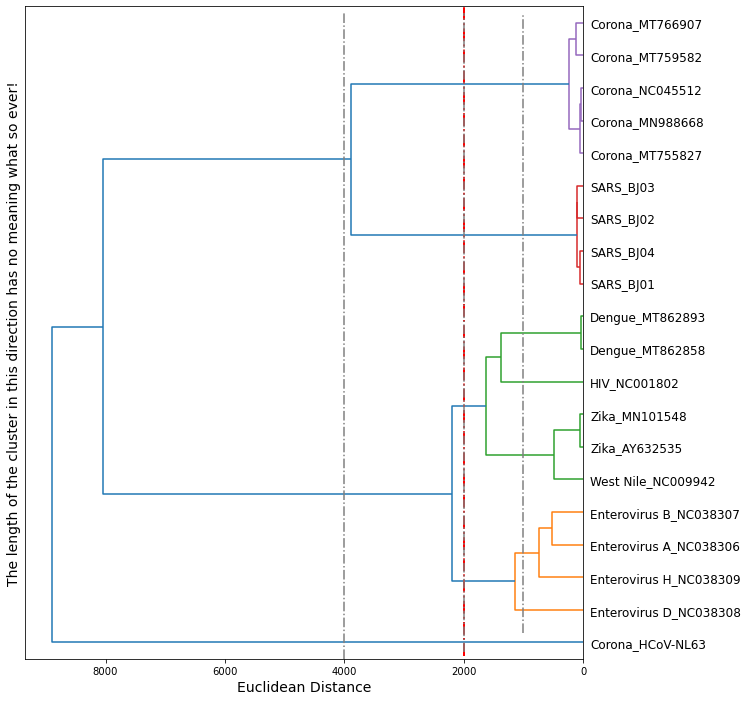

In [6]:
plt.figure(figsize=(10, 12))
plt.title=('20 Viruses Hierarchical Clustering Dendrogram')
plt.xlabel('Euclidean Distance', fontsize=14)
plt.ylabel('The length of the cluster in this direction has no meaning what so ever!', fontsize=14)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
plt.vlines(x=2000, ymin=1.0, ymax=200., linestyles='dashdot', color='r', lw=2)
plt.vlines(x=[4000,2000, 1000], ymin=[0, 2, 8], ymax=198., linestyles='dashdot', color='#7f7f7f')
plt.show()    
plt.close()

In [7]:
plt.figure(figsize=(10, 12))
plt.title('20 Viruses Hierarchical Clustering Dendrogram')
plt.xlabel('Euclidean Distance', fontsize=14)
plt.ylabel('The length of the cluster in this direction has no meaning what so ever!', fontsize=14)
dendrogram(linkage_matrix, labels=virus_names[:], orientation="left", color_threshold=0.2*max(linkage_matrix[:,2]))
plt.vlines(x=2000, ymin=1.0, ymax=200., linestyles='dashdot', color='r', lw=2)
plt.vlines(x=[4000,2000, 1000], ymin=[0, 2, 8], ymax=198., linestyles='dashdot', color='#7f7f7f')
plt.show()    
plt.close()

TypeError: 'str' object is not callable

<Figure size 720x864 with 0 Axes>